In [1]:
# pip install python-docx

In [152]:
# pip install docx2txt

In [1]:
import docx
# from docx.shared import Pt 
# from docx.enum.text import WD_ALIGN_PARAGRAPH

In [2]:
path = '/Users/ktg/Desktop/protoype/database/data/input/판넬양식.docx'

In [41]:
from docx import Document
# from docx.enum.table import WD_CELL_VERTICAL_ALIGNMENT
from PIL import Image
import io

def extract_text(doc):
    paragraphs = [p.text for p in doc.paragraphs]
    return '\n'.join(paragraphs)

def extract_tables(doc):
    tables = []
    for table in doc.tables:
        data = []
        for row in table.rows:
            cells = []
            for cell in row.cells:
                cells.append(cell.text)
            data.append(' '.join(cells))
        tables.append(' '.join(data))
    return '\n'.join(tables)

def extract_images(doc):
    images = []
    for rel in doc.part.rels.values():
        if "image" in rel.reltype:
            image_data = rel.target_part.blob
            # ext = 
            image = io.BytesIO(image_data)
            image = Image.open(image)
            images.append(image)
    return images

In [42]:
extract_tables(doc)

'11 12 13 14 21 22 23 24 31 32 33 34 41 42 43 44'

In [14]:
images = []
for rel in doc.part.rels.values():
    print(rel.reltype)
    if "image" in rel.reltype:
        image_blob = rel.target_part.blob
        ext = rel.target_part.filename.split('.')[-1]
        # save_path = f"{self.fileutil.res_dir}{self.name}/image_{num}.{ext}"
        with open(save_path, "wb") as file:
            file.write(image_blob)
        image = io.BytesIO(image_data)
        image = Image.open(image)
        images.append(image)

http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlformats.org/officeDocument/2006/relationships/theme
http://schemas.openxmlformats.org/officeDocument/2006/relationships/settings
http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlformats.org/officeDocument/2006/relationships/fontTable
http://schemas.openxmlformats.org/officeDocument/2006/relationships/styles
http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlformats.org/officeDocument/2006/relationships/numbering
http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlformats.org/officeDocument/2006/relationships/image
http://schemas.openxmlform

In [39]:
list(doc.part.rels.values())[0].target_part.filename.split('.')[-1]

'jpeg'

In [20]:
dir(list(doc.part.rels.values())[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_baseURI',
 '_is_external',
 '_rId',
 '_reltype',
 '_target',
 'is_external',
 'rId',
 'reltype',
 'target_part',
 'target_ref']

In [5]:
# word 문서 전체를 읽어들이기
doc = docx.Document(path)

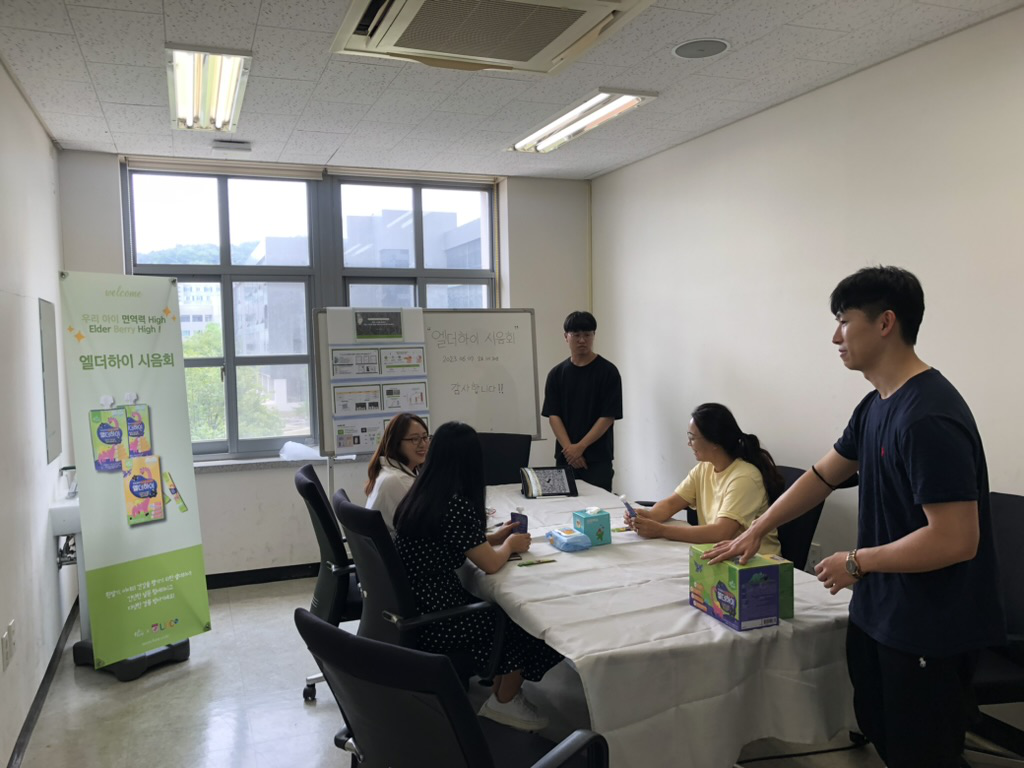

In [13]:
extract_images(doc)[-1]

In [11]:
for x in extract_images(doc):
    x

In [124]:
text = docx2txt.process(path)

In [125]:
from docx import Document
from docx.enum.table import WD_CELL_VERTICAL_ALIGNMENT

def load_content_from_docx(docx_file):
    doc = Document(docx_file)
    content = []

    for element in doc.element.body:
        # print(element.tag)
        if element.tag.endswith(('p', 'tbl')):
            content.append(element)

    return content

def process_paragraph(paragraph):
    # Process paragraphs as needed
    # e.g., extract text, apply formatting, etc.
    return paragraph.text

def process_table(table):
    # Process tables as needed
    # e.g., extract data, manipulate rows/columns, etc.
    table_content = []
    for row in table.rows:
        for cell in row.cells:
            table_content.append(cell.text)
    return table_content

def process_content(content):
    processed_content = []
    for element in content:
        if element.tag.endswith('p'):
            processed_content.append(process_paragraph(element))
        elif element.tag.endswith('tbl'):
            processed_content.append(process_table(element))
    return processed_content

In [129]:
# Open the document
doc = Document(path)

In [130]:
# Extract text
text = extract_text(doc)
print('Extracted Text:\n', text)

Extracted Text:
 대표사진

[이미지1] : 팀 Average 99 


[이미지2]: 오프라인 캠페인 활동

활동주제
<데이터 분석에 기반한 마케팅 전략 설계>
● 과제선정배경
비즈니스와 IT의 창의적 융합 교육을 통해 사회에서 요구하는 비즈니스 IT 융합전문가를 양성하는 디지털경영전공의 방향성에 맞게 수업에서 학습한 내용을 활용하여, 데이터 분석 기반 기술을 통해 기업 측에 인사이트를 제공하는 과제를 수행하고자 함.
● 협업기업
㈜퓨어는 주요 영양소의 생체흡수율을 증대시킬 수 있는 바이오 푸드테크 기술을 활용하여 영유아를 위한 제품을 판매하는 푸드테크 기업으로, 영유아 건강제품인 “엘더하이 음료수”를 판매중이며, “엘더하이 스틱형 젤리”를 출시할 예정임.
[이미지3] : 엘더하이 음료수 , [이미지4] : 엘더하이 스틱형 젤리
요구사항
- 브랜드 인지도 향상 및 신규 고객 유치
- 신제품에 대한 고객 의견 수립과 홍보
- 차별화되고 지속 성장 가능한 마케팅 전략 수립
● 과제목표
기업 측의 요구사항을 토대로 데이터 분석을 활용한 마케팅 프로세스를 정립하여 지속 가능한 프로세스를 구축하는 것을 목표로 함.

진행내용
● 온라인 마케팅 컨텐츠 제작
카드뉴스 형태로 온라인 마케팅 콘텐츠를 제작함. 영유야 제품군의 리뷰 데이터를 분석하여 고객들이 제품에서 중요하게 여기는 키워드를 추출함. 키워드 인사이트와 생성형 AI를 사용하여 문구를 제작하고, 설문조사를 통해 실용성을 입증함.
[이미지5]: 리뷰 데이터 분석 결과 키워드 추출
● 오프라인 캠페인 활동
시음회 형식의 캠페인 활동을 통해 기존/신규 제품의 소개 및 홍보 효과와 함께 설문조사를 진행하여 고객 반응과 제품평가를 파악하는 것을 목표로 삼음. 세종시의 지역적, 인구통계학적 데이터를 분석하여 향후 타겟 마케팅을 지원할 수 있도록 시각화함. 또한 캠페인 활동에 필요한 배너와 리플렛을 제작하여 활동에 활용함. 
[이미지6]: 세종시 내 영유아 밀집 구역 시각화
[이미지7]: 배너 및 리플렛 제작



In [131]:
# Extract tables
tables = extract_tables(doc)
print('Extracted Tables:')
for idx, table in enumerate(tables):
    print('Table', idx+1)
    for row in table:
        print(row)

Extracted Tables:
Table 1
['11', '12', '13', '14']
['21', '22', '23', '24']
['31', '32', '33', '34']
['41', '42', '43', '44']


In [132]:
# Extract images
images = extract_images(doc)
# print('Extracted Images:')
# for idx, image in enumerate(images):
#     image.save(f'image_{idx+1}.png')
#     print(f'Saved image_{idx+1}.png')

In [135]:
load_content_from_docx(path)

{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordprocessingml/2006/main}p
{http://schemas.openxmlformats.org/wordp

[<CT_P '<w:p>' at 0x134a38e50>,
 <CT_P '<w:p>' at 0x134a38c20>,
 <CT_P '<w:p>' at 0x134a38a90>,
 <CT_P '<w:p>' at 0x134a41f90>,
 <CT_P '<w:p>' at 0x13546eef0>,
 <CT_P '<w:p>' at 0x13546ed60>,
 <CT_P '<w:p>' at 0x1354294f0>,
 <CT_P '<w:p>' at 0x134a54090>,
 <CT_P '<w:p>' at 0x134a54040>,
 <CT_P '<w:p>' at 0x134a54950>,
 <CT_P '<w:p>' at 0x134a54770>,
 <CT_P '<w:p>' at 0x134a54590>,
 <CT_P '<w:p>' at 0x134a54450>,
 <CT_P '<w:p>' at 0x134a548b0>,
 <CT_P '<w:p>' at 0x134a549f0>,
 <CT_P '<w:p>' at 0x134a54b30>,
 <CT_P '<w:p>' at 0x134a54b80>,
 <CT_P '<w:p>' at 0x134a54810>,
 <CT_P '<w:p>' at 0x134a54f40>,
 <CT_P '<w:p>' at 0x134a54ea0>,
 <CT_P '<w:p>' at 0x134a54a90>,
 <CT_P '<w:p>' at 0x134a54bd0>,
 <CT_P '<w:p>' at 0x134a54c20>,
 <CT_P '<w:p>' at 0x134a54d60>,
 <CT_P '<w:p>' at 0x134a54900>,
 <CT_P '<w:p>' at 0x134a544a0>,
 <CT_P '<w:p>' at 0x134a54310>,
 <CT_P '<w:p>' at 0x134a54180>,
 <CT_P '<w:p>' at 0x134a545e0>,
 <CT_P '<w:p>' at 0x134a54270>,
 <CT_P '<w:p>' at 0x134a541d0>,
 <CT_P '